# Question:
Should we have hyperparameter tuning and cross validation in here?

### Dataset description

We will use the Titanic dataset, one of the classics for classification tasks.
The dataset is already split in train and test sets, since it has been used for some competitions in the past.

The train set includes these columns:
- PassengerId: The unique identifier of each passenger. It has no meaning
- Survived: Our label, indicates if the passenger will survive or not (unsurprisingly)
  - 0: the passenger dies
  - 1: the passenger survives
- pclass: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- name: The name of the passenger
- sex: The sex of the passenger.
  - Male
  - Female
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The number of siblings / spouses aboard the Titanic
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife

- parch: The number of parents / children aboard the Titanic 	
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson

- Ticket: 	The ticket number
- Fare: The price paid by each passenger
- Cabin: 	The cabin number
- Embarked: The port of Embarkation
  - C = Cherbourg,
  - Q = Queenstown,
  - S = Southampton

### Plan for the lab:

- Open the dataset 🔜
- Explore the dataset 🔜
- Split the data in train and test
- Make sure that there are no missing values
- Make sure that there are no erroneous values (e.g. words where only numbers should be)
- Scale the data
- Train two classification models on the data
- Compare the performance of the two models on the test data

In [1]:
# # Import the basic libraries: pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Load the data
train = pd.read_csv('titanic_train.csv')

In [3]:
# Display the first few rows of the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Print data imbalance
print(train['Survived'].value_counts())

# print the proportion of the positive class to the negative class
print('Proportion:', round(train['Survived'].value_counts()[0] / train['Survived'].value_counts()[1], 2), ': 1')

Survived
0    549
1    342
Name: count, dtype: int64
Proportion: 1.61 : 1


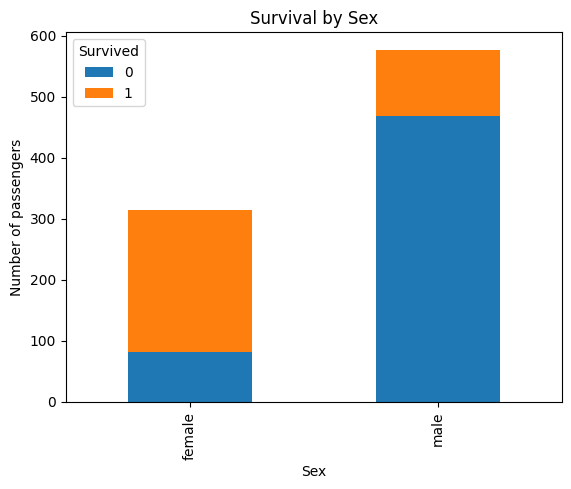

Percentage of overall survivors 0.3838383838383838
Percentage of male survivors 0.18890814558058924
Percentage of female survivors 0.7420382165605095


In [6]:
# Group by 'Sex' and 'Survived', then unstack the 'Survived' level to create columns for each survival status
survival_data_gender = train.groupby(['Sex', 'Survived']).size().unstack('Survived')

# Plot the data
survival_data_gender.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Number of passengers')
plt.title('Survival by Sex')

# Display the plot
plt.show()

# Print the percentage of survivors, then the percentage of survivors by gender
print('Percentage of overall survivors', train['Survived'].mean())
# filter the data to include only rows where the column 'Sex' is equal to 'male'
train_male = train[train['Sex']=='male']
print('Percentage of male survivors', train_male['Survived'].mean())

# filter the data to include only rows where the column 'Sex' is equal to 'female'
train_female = train[train['Sex']=='female']
print('Percentage of female survivors', train_female['Survived'].mean())

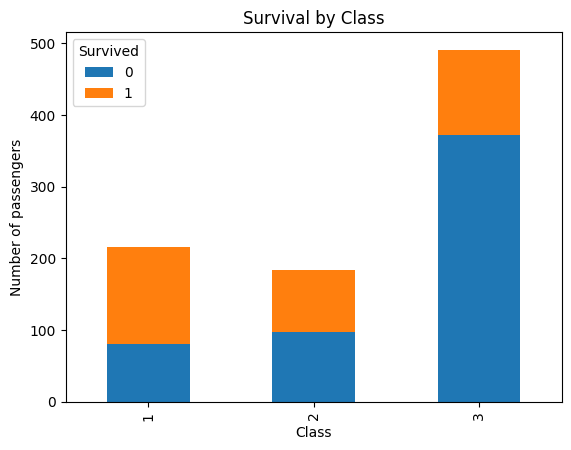

Percentage of overall survivors 0.3838383838383838
Percentage of survivors in 1st class 0.6296296296296297
Percentage of survivors in 2nd class 0.47282608695652173
Percentage of survivors in 3rd class 0.24236252545824846


In [7]:
# Group by 'Pclass' and 'Survived', then unstack the 'Survived' level to create columns for each survival status
survival_data_class = train.groupby(['Pclass', 'Survived']).size().unstack('Survived')

# Plot the data
survival_data_class.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of passengers')
plt.title('Survival by Class')

# Display the plot
plt.show()

# Print the percentage of survivors, then the percentage of survivors by class
print('Percentage of overall survivors', train['Survived'].mean())
# filter the data to include only rows where the column 'Sex' is equal to 'male'
train_class1 = train[train['Pclass']==1]
print('Percentage of survivors in 1st class', train_class1['Survived'].mean())

# filter the data to include only rows where the column 'Sex' is equal to 'female'
train_class2 = train[train['Pclass']==2]
print('Percentage of survivors in 2nd class', train_class2['Survived'].mean())

# filter the data to include only rows where the column 'Sex' is equal to 'female'
train_class3 = train[train['Pclass']==3]
print('Percentage of survivors in 3rd class', train_class3['Survived'].mean())

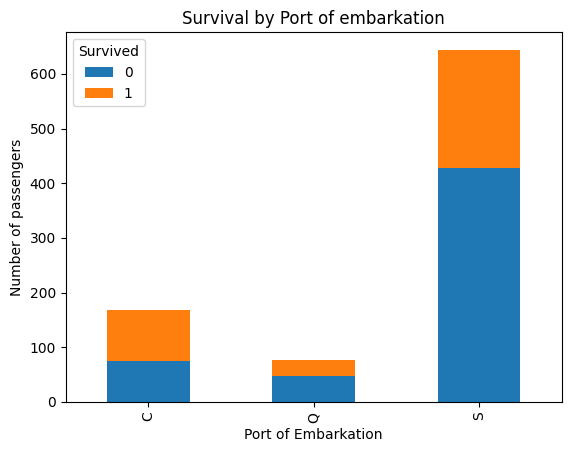

Percentage of overall survivors 0.3838383838383838
Percentage of survivors embarked in port C 0.5535714285714286
Percentage of survivors embarked in port Q 0.38961038961038963
Percentage of survivors embarked in port S 0.33695652173913043


In [8]:
# Group by 'Embarked' and 'Survived', then unstack the 'Survived' level to create columns for each survival status
survival_data_class = train.groupby(['Embarked', 'Survived']).size().unstack('Survived')

# Plot the data
survival_data_class.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of passengers')
plt.title('Survival by Port of embarkation')

# Display the plot
plt.show()

# Print the percentage of survivors, then the percentage of survivors by class
print('Percentage of overall survivors', train['Survived'].mean())
# filter the data to include only rows where the column 'Sex' is equal to 'male'
train_portC = train[train['Embarked']=='C']
print('Percentage of survivors embarked in port C', train_portC['Survived'].mean())

# filter the data to include only rows where the column 'Sex' is equal to 'female'
train_portQ = train[train['Embarked']=='Q']
print('Percentage of survivors embarked in port Q', train_portQ['Survived'].mean())

# filter the data to include only rows where the column 'Sex' is equal to 'female'
train_portS = train[train['Embarked']=='S']
print('Percentage of survivors embarked in port S', train_portS['Survived'].mean())

In [9]:
# Check the missing values in the train set
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Drop the Cabin column, which has a lot of missing values
train.drop('Cabin', axis=1, inplace=True)

In [11]:
# Delete the rows with missing values in the Embarked column
train.dropna(subset=['Embarked'], inplace=True)
train.reset_index(drop=True, inplace=True)

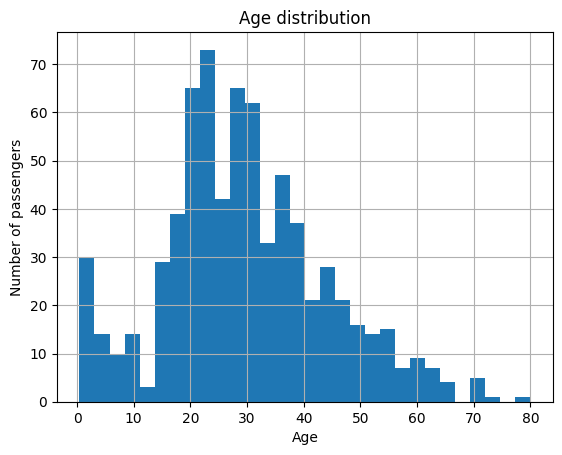

In [12]:
# Plot a histogram of the Age column
train['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution')
plt.show()

## Observation:

The distribution of the age values appears to be non-normal. As such, imputing with the mean would be wrong.

In [13]:
# print the number of passengers with age = 0
print('Number of passengers with age == 0:', train[train['Age'] == 0].shape[0])

Number of passengers with age == 0: 0


In [14]:
y = train['Survived']
X = train.drop('Survived', axis=1)

以以下比例划分：

- `X_train` 和 `y_train`：占原始数据的 60%，用于模型训练。
- `X_test` 和 `y_test`：占原始数据的 20%，用于模型测试。
- `X_val` 和 `y_val`：占原始数据的 20%，用于模型验证。

In [15]:
# Split the data into a training and a test set
from sklearn.model_selection import train_test_split
X_mix, X_val, y_mix, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_mix, y_mix, test_size=0.25, random_state=0, stratify=y_mix)

print("Training set (_train):", X_train.shape, y_train.shape, len(y_train)/len(y))
print("Validation set (_val):", X_val.shape, y_val.shape, len(y_val)/len(y))
print("Test set (_test):", X_test.shape, y_test.shape, len(y_test)/len(y))

Training set (_train): (533, 10) (533,) 0.5995500562429696
Validation set (_val): (178, 10) (178,) 0.20022497187851518
Test set (_test): (178, 10) (178,) 0.20022497187851518


In [16]:
# create a list if the numerical columns
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
# Standardize the numeric data: remember, kNN is sensitive to the scales of the features!
# Let's also keep a non-standardized version of the data to see if standardization makes a difference

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_train_scaled = scaler.fit_transform(X_train[num_cols])
num_train_scaled = pd.DataFrame(num_train_scaled, columns=num_cols)

# Let's repeat the same steps for the test data
num_val_scaled = scaler.transform(X_val[num_cols])
num_val_scaled = pd.DataFrame(num_val_scaled, columns=num_cols)

num_test_scaled = scaler.transform(X_test[num_cols])
num_test_scaled = pd.DataFrame(num_test_scaled, columns=num_cols)

print(num_train_scaled)
print(num_val_scaled)
print(num_test_scaled)

          Age  SibSp     Parch      Fare
0    0.290877  0.000  0.000000  0.014151
1    0.481795  0.125  0.333333  0.234224
2    0.113596  0.125  0.166667  0.031035
3         NaN  0.000  0.000000  0.014102
4    0.277240  0.000  0.000000  0.015225
..        ...    ...       ...       ...
528  0.522706  0.000  0.833333  0.056848
529  0.863630  0.000  0.000000  0.050749
530  0.018137  0.125  0.166667  0.050749
531  0.277240  0.000  0.000000  0.015330
532  0.277240  0.250  0.000000  0.143462

[533 rows x 4 columns]
          Age  SibSp     Parch      Fare
0    0.543161  0.000  0.333333  0.028302
1    0.440884  0.000  0.000000  0.018543
2    0.522706  0.125  0.833333  0.061045
3    0.372699  0.000  0.000000  0.018543
4    0.236329  0.250  0.333333  0.512122
..        ...    ...       ...       ...
173  0.959089  0.000  0.000000  0.067640
174  0.372699  0.000  0.000000  0.051822
175  0.331788  0.000  0.000000  0.014932
176  0.249966  0.000  0.000000  0.028302
177  0.249966  0.000  0.000000  0

In [17]:
# Let's create the same list, but for categorical columns
cat_cols = ['Pclass', 'Sex', 'Embarked']

# Let's check the types of the columns
print(X_train[cat_cols].dtypes)


Pclass       int64
Sex         object
Embarked    object
dtype: object


In [18]:
# Pclass is encoded as an int, but it is actually a categorical variable
X_train['Pclass'] = X_train['Pclass'].astype('object')
X_val['Pclass'] = X_val['Pclass'].astype('object')
X_test['Pclass'] = X_test['Pclass'].astype('object')

# Let's check the types of the columns again
print(X_train[cat_cols].dtypes)

print(X_train[cat_cols])
print(X_val[cat_cols])
print(X_test[cat_cols])

Pclass      object
Sex         object
Embarked    object
dtype: object
    Pclass     Sex Embarked
319      3    male        S
762      1  female        S
488      3    male        S
353      3    male        C
51       3    male        S
..     ...     ...      ...
883      3  female        Q
544      1    male        S
529      2  female        S
622      3    male        S
119      2    male        S

[533 rows x 3 columns]
    Pclass     Sex Embarked
152      3    male        S
751      3    male        S
609      3  female        S
199      3    male        S
310      1  female        C
..     ...     ...      ...
95       1    male        C
429      1    male        S
74       3    male        S
574      3    male        S
142      3    male        Q

[178 rows x 3 columns]
    Pclass     Sex Embarked
713      2    male        S
523      3    male        C
203      3    male        S
260      3    male        S
659      1    male        S
..     ...     ...      ...
566      3  f

In [19]:
# Let's now one-hot encode the categorical columns. There are two ways to do this: using the get_dummies function from pandas, or using the OneHotEncoder from scikit-learn.
X_train_cat = pd.get_dummies(X_train[cat_cols], drop_first=True)
X_val_cat = pd.get_dummies(X_val[cat_cols], drop_first=True)
X_test_cat = pd.get_dummies(X_test[cat_cols], drop_first=True)

# Let's use the OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_cat2 = encoder.fit_transform(X_train[cat_cols])
X_val_cat2 = encoder.transform(X_val[cat_cols])
X_test_cat2 = encoder.transform(X_test[cat_cols])

print('The type of the trasformed output is:', type(X_train_cat2))

# Since we used sklearn, the output is a matrix, not a DataFrame. Let's convert it to a DataFrame
X_train_cat2 = pd.DataFrame(X_train_cat2.toarray(), columns=encoder.get_feature_names_out(input_features=cat_cols))
X_val_cat2 = pd.DataFrame(X_val_cat2.toarray(), columns=encoder.get_feature_names_out(input_features=cat_cols))
X_test_cat2 = pd.DataFrame(X_test_cat2.toarray(), columns=encoder.get_feature_names_out(input_features=cat_cols))



The type of the trasformed output is: <class 'scipy.sparse._csr.csr_matrix'>


In [20]:
X_train_cat.head()

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
319,False,True,True,False,True
762,False,False,False,False,True
488,False,True,True,False,True
353,False,True,True,False,False
51,False,True,True,False,True


In [21]:
X_train_cat2.head()

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0


In [22]:
# trasnform the true values to 1 and the false values to 0
X_train_cat = X_train_cat.astype('int')
# trasnform the values to ints
X_train_cat2 = X_train_cat2.astype('int')

In [23]:
# compare the values of the dataframes in the two methods
cat_values = X_train_cat.values
cat2_values = X_train_cat2.values
print('Are the values the same?', (cat_values == cat2_values).all())

Are the values the same? True


Was it worth to follow all the additional steps to obtain the same result?

In [24]:
# Fill the missing values in the Age column with the median age
median_value = num_train_scaled['Age'].median()

num_train_scaled_median = num_train_scaled.copy()
num_val_scaled_median = num_val_scaled.copy()
num_test_scaled_median = num_test_scaled.copy()

num_train_scaled_median['Age'] = num_train_scaled_median['Age'].fillna(median_value)
num_val_scaled_median['Age'] = num_val_scaled_median['Age'].fillna(median_value)
num_test_scaled_median['Age'] = num_test_scaled_median['Age'].fillna(median_value)

In [25]:
# Fill the missing columns in the Age column with a KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

num_train_scaled_KNN = num_train_scaled.copy()
num_val_scaled_KNN = num_val_scaled.copy()
num_test_scaled_KNN = num_test_scaled.copy()

num_train_scaled_KNN = imputer.fit_transform(num_train_scaled_KNN)
num_val_scaled_KNN = imputer.transform(num_val_scaled_KNN)
num_test_scaled_KNN = imputer.transform(num_test_scaled_KNN)

num_train_scaled_KNN = pd.DataFrame(num_train_scaled_KNN, columns=num_cols)
num_val_scaled_KNN = pd.DataFrame(num_val_scaled_KNN, columns=num_cols)
num_test_scaled_KNN = pd.DataFrame(num_test_scaled_KNN, columns=num_cols)

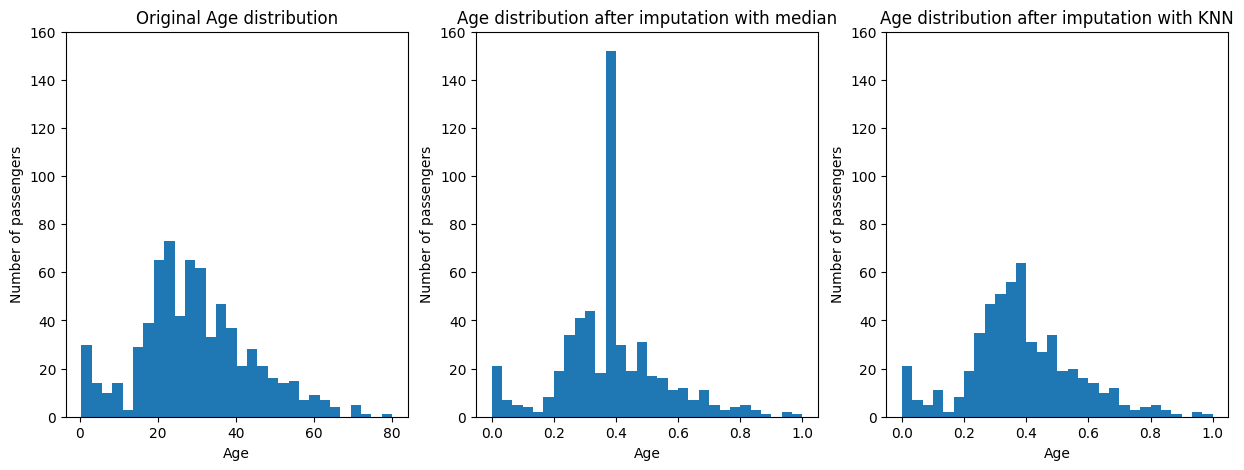

In [26]:
# compare the two methods, plotting the histograms of the Age columns before imputation, and after imputation with the median and KNN methods.
# set the scales of the histograms to be the same

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(train['Age'].dropna(), bins=30)
axs[0].set_title('Original Age distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of passengers')
axs[1].hist(num_train_scaled_median['Age'], bins=30)
axs[1].set_title('Age distribution after imputation with median')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of passengers')
axs[2].hist(num_train_scaled_KNN['Age'], bins=30)
axs[2].set_title('Age distribution after imputation with KNN')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Number of passengers')
axs[0].set_ylim(0, 160)
axs[1].set_ylim(0, 160)
axs[2].set_ylim(0, 160)
plt.show()




# Let's now train a KNN and a Decision Tree Classifiers using only the categorical data
#### We will compare the training process with a single split and with cross validation

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV, ParameterGrid


In [28]:
param_grid_tree = {'max_depth': [2, 3, 4],
                   'min_samples_split': [2, 3, 4],
                   'min_samples_leaf': [1, 2, 3]}

performance_tree = []
for parameter_tree_combination in ParameterGrid(param_grid_tree):
    tree = DT(**parameter_tree_combination)
    tree.fit(X_train_cat2, y_train)
    y_tree = tree.predict(X_val_cat2)
    performance_tree.append(sklearn.metrics.f1_score(y_val, y_tree, average='macro'))

# print the average of the f1 scores
print('Average F1 score for Decision Tree:', sum(performance_tree) / len(performance_tree))

Average F1 score for Decision Tree: 0.8270269316906033


In [29]:
grid_search_tree = GridSearchCV(DT(random_state=0), param_grid_tree, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(X_train_cat2, y_train)
print('Best parameters for Decision Tree:', grid_search_tree.best_params_)
print('Average F1 score for Decision Tree:', grid_search_tree.cv_results_['mean_test_score'].mean())

Best parameters for Decision Tree: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Average F1 score for Decision Tree: 0.7512466414740822


In [30]:
param_grid_KNN = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

performance_KNN = []
for parameter_KNN_combination in ParameterGrid(param_grid_KNN):
    knn = KNN(**parameter_KNN_combination)
    knn.fit(X_train_cat2, y_train)
    y_knn = knn.predict(X_val_cat2)
    performance_KNN.append(sklearn.metrics.f1_score(y_val, y_knn, average='macro'))

# print the average of the f1 scores
print('Average F1 score for KNN:', sum(performance_KNN) / len(performance_KNN))

Average F1 score for KNN: 0.8172890412169704


In [31]:
grid_search_KNN = GridSearchCV(KNN(), param_grid_KNN, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_KNN.fit(X_train_cat2, y_train)
print('Best parameters for KNN:', grid_search_KNN.best_params_)
# print the average score
print('Average F1 score for KNN:', grid_search_KNN.cv_results_['mean_test_score'].mean())

Best parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}
Average F1 score for KNN: 0.708434127924014


# Let's now repeat the process for the numerical features

In [32]:
performance_tree = []
for parameter_tree_combination in ParameterGrid(param_grid_tree):
    tree = DT(**parameter_tree_combination)
    tree.fit(num_train_scaled_KNN, y_train)
    y_tree = tree.predict(num_val_scaled_KNN)
    performance_tree.append(sklearn.metrics.f1_score(y_val, y_tree, average='macro'))
    
# print the average of the f1 scores
print('Average F1 score for Decision Tree:', sum(performance_tree) / len(performance_tree))

Average F1 score for Decision Tree: 0.6362803839385204


In [33]:
grid_search_tree = GridSearchCV(DT(random_state=0), param_grid_tree, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(num_train_scaled_KNN, y_train)
print('Best parameters for Decision Tree:', grid_search_tree.best_params_)
print('Average F1 score for Decision Tree:', grid_search_tree.cv_results_['mean_test_score'].mean())

Best parameters for Decision Tree: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Average F1 score for Decision Tree: 0.6425414487116574


In [34]:
performance_KNN = []
for parameter_KNN_combination in ParameterGrid(param_grid_KNN):
    knn = KNN(**parameter_KNN_combination)
    knn.fit(num_train_scaled_KNN, y_train)
    y_knn = knn.predict(num_val_scaled_KNN)
    performance_KNN.append(sklearn.metrics.f1_score(y_val, y_knn, average='macro'))

# print the average of the f1 scores
print('Average F1 score for KNN:', sum(performance_KNN) / len(performance_KNN))

Average F1 score for KNN: 0.599254992047096


In [35]:
grid_search_KNN = GridSearchCV(KNN(), param_grid_KNN, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_KNN.fit(num_train_scaled_KNN, y_train)
print('Best parameters for KNN:', grid_search_KNN.best_params_)
print('Average F1 score for KNN:', grid_search_KNN.cv_results_['mean_test_score'].mean())

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Average F1 score for KNN: 0.6369082277895236


# Let's now repeat the process for all the features

In [36]:
# merge the categorical and numerical data
X_train_all = pd.concat([X_train_cat2, num_train_scaled_KNN], axis=1)
X_val_all = pd.concat([X_val_cat2, num_val_scaled_KNN], axis=1)
X_test_all = pd.concat([X_test_cat2, num_test_scaled_KNN], axis=1)

In [37]:
performance_tree = []
for parameter_tree_combination in ParameterGrid(param_grid_tree):
    tree = DT(**parameter_tree_combination)
    tree.fit(X_train_all, y_train)
    y_tree = tree.predict(X_val_all)
    performance_tree.append(sklearn.metrics.f1_score(y_val, y_tree, average='macro'))

# print the average of the f1 scores
print('Average F1 score for Decision Tree:', sum(performance_tree) / len(performance_tree))

Average F1 score for Decision Tree: 0.8267645756608865


In [38]:
grid_search_tree = GridSearchCV(DT(random_state=0), param_grid_tree, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(X_train_all, y_train)
print('Best parameters for Decision Tree:', grid_search_tree.best_params_)
print('Average F1 score for Decision Tree:', grid_search_tree.cv_results_['mean_test_score'].mean())

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Average F1 score for Decision Tree: 0.7561890365043256


In [39]:
from sklearn.metrics import pairwise_distances

In [40]:
# Let's compute the Hamming distance for the categorical data
hamming_dist = pairwise_distances(X_train_cat2, metric='hamming')

# Let's compute the Euclidean distance for the numerical data
euclidean_dist = pairwise_distances(num_train_scaled_KNN, metric='euclidean')

# Let's combine the two distances. Since the categorical features are 5 and the numerical features are 4, we will use these as weights
multi_dist = hamming_dist * 5/9 + euclidean_dist * 4/9


In [41]:
grid_search_KNN = GridSearchCV(KNN(metric='precomputed'), param_grid_KNN, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_KNN.fit(multi_dist, y_train)
print('Best parameters for KNN:', grid_search_KNN.best_params_)
print('Average F1 score for KNN:', grid_search_KNN.cv_results_['mean_test_score'].mean())

Best parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Average F1 score for KNN: 0.7561797695688698


In [42]:
performance_tree = []
for parameter_tree_combination in ParameterGrid(param_grid_tree):
    tree = DT(**parameter_tree_combination)
    tree.fit(X_train_cat2, y_train)
    y_tree = tree.predict(X_val_cat2)
    # append the parameters and their performance to the list
    performance_tree.append((parameter_tree_combination, sklearn.metrics.f1_score(y_val, y_tree, average='macro')))

# find the best parameters
best_parameters_tree = max(performance_tree, key=lambda x: x[1])
print('Best parameters for Decision Tree:', best_parameters_tree[0])

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
# let's now train the model with the best parameters
tree = DT(**best_parameters_tree[0])
tree.fit(X_train_cat2, y_train)
y_tree = tree.predict(X_test_cat2)
print('F1 score for Decision Tree:', sklearn.metrics.f1_score(y_test, y_tree, average='macro'))

F1 score for Decision Tree: 0.7785421545667447


In [44]:
performance_KNN = []
for parameter_KNN_combination in ParameterGrid(param_grid_KNN):
    knn = KNN(**parameter_KNN_combination)
    knn.fit(X_train_cat2, y_train)
    y_knn = knn.predict(X_val_cat2)
     # append the parameters and their performance to the list
    performance_KNN.append((parameter_KNN_combination, sklearn.metrics.f1_score(y_val, y_knn, average='macro')))

# find the best parameters
best_parameters_KNN = max(performance_KNN, key=lambda x: x[1])
print('Best parameters for KNN:', best_parameters_KNN[0])

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}


In [45]:
knn = KNN(**best_parameters_KNN[0])
knn.fit(X_train_cat2, y_train)
y_knn = knn.predict(X_test_cat2)
print('F1 score for KNN:', sklearn.metrics.f1_score(y_test, y_knn, average='macro'))

F1 score for KNN: 0.7595844155844156
